In [23]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt


In [24]:
iris = datasets.load_iris()
X = iris["data"][:, (2,3)]
y = (iris["target"]==2).astype(np.float64)
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [25]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
X, y = make_moons(n_samples=100, noise=0.15)
poly_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("Linear_svm", LinearSVC(C=10, loss="hinge"))
])
poly_svm_clf.fit(X, y)

/usr/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('Linear_svm', LinearSVC(C=10, loss='hinge'))])

In [26]:
poly_svm_clf.predict([[1, -0.5]])

array([1])

In [27]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)),
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [28]:
poly_kernel_svm_clf.predict([[1, -0.5]])

array([1])

In [29]:
rbf_kernel_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [30]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)


LinearSVR(epsilon=1.5)

In [31]:
from sklearn.svm import SVR
svm_kernel_reg = SVR(degree=2, kernel="poly", C=100, epsilon=0.1)

In [32]:
svm_clf.score

<bound method Pipeline.score of Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])>

In [33]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [34]:
iris.feature_names
iris["data"] 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

EXERCISES: LIN SEP DATASET

In [35]:
train_data = iris["data"]
train_labels = (iris["target"]==0).astype(np.float64) #setosa

In [36]:
train_data[:10],train_labels[:10].reshape(-1,1)

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1]]),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]))

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels,
                                test_size=0.2, random_state=42)

In [38]:
linear_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=1, loss="hinge")),
])
linear_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=1, loss='hinge'))])

In [39]:
y_hat = linear_svm_clf.predict(X_val) 

In [40]:
y_hat == y_val
m = len(X_train)

In [41]:
from sklearn.linear_model import SGDClassifier
sgd_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("sgdc", SGDClassifier(loss="hinge", alpha=1/m))
])

In [42]:
sgd_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgdc', SGDClassifier(alpha=0.008333333333333333))])

In [43]:
y_hat = sgd_clf.predict(X_val)

In [44]:
y_hat == y_val

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [45]:
svc_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="linear", gamma=2, C=1))
])
svc_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=1, gamma=2, kernel='linear'))])

In [46]:
y_hat = svc_clf.predict(X_val)
y_hat == y_val

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [47]:
lin_clf_tmp = linear_svm_clf.named_steps["svm_clf"]
svc_clf_tmp = svc_clf.named_steps["svc"]
sgd_clf_tmp = sgd_clf.named_steps["sgdc"]

In [48]:
svc_clf_tmp.coef_

array([[-0.42827082,  0.33990517, -0.88033597, -0.91882081]])

In [49]:
print("LinearSVC:                   ", lin_clf_tmp.intercept_, lin_clf_tmp.coef_)
print("SVC:                         ", svc_clf_tmp.intercept_, svc_clf_tmp.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf_tmp.alpha), sgd_clf_tmp.intercept_, sgd_clf_tmp.coef_)

LinearSVC:                    [-0.76621986] [[-0.16004429  0.55898113 -0.81950475 -0.88036897]]
SVC:                          [-1.41202257] [[-0.42827082  0.33990517 -0.88033597 -0.91882081]]
SGDClassifier(alpha=0.00833): [-1.32694742] [[-0.54580713  0.50790483 -0.97571068 -0.80182451]]


In [50]:
w1 = -lin_clf_tmp.coef_[0, 0]/lin_clf_tmp.coef_[0, 1]
b1 = -lin_clf_tmp.intercept_[0]/lin_clf_tmp.coef_[0, 1]
w2 = -svc_clf_tmp.coef_[0, 0]/svc_clf_tmp.coef_[0, 1]
b2 = -svc_clf_tmp.intercept_[0]/svc_clf_tmp.coef_[0, 1]
w3 = -sgd_clf_tmp.coef_[0, 0]/sgd_clf_tmp.coef_[0, 1]
b3 = -sgd_clf_tmp.intercept_[0]/sgd_clf_tmp.coef_[0, 1]

In [51]:
w3

1.0746247885760645

In [52]:
scaler = StandardScaler()
scaler.fit_transform(X_train[:, (2,3)])

array([[-1.56253475, -1.31260282],
       [-1.27600637, -1.04563275],
       [ 0.38585821,  0.28921757],
       [-1.2187007 , -1.31260282],
       [-1.39061772, -1.31260282],
       [ 0.72969227,  0.95664273],
       [ 0.44316389,  0.4227026 ],
       [-1.27600637, -1.31260282],
       [-1.33331205, -1.31260282],
       [-1.27600637, -1.44608785],
       [ 0.78699794,  0.95664273],
       [ 0.44316389,  0.55618763],
       [ 0.55777524,  0.4227026 ],
       [-1.39061772, -1.04563275],
       [-1.27600637, -1.31260282],
       [-0.01528151, -0.24472256],
       [ 0.78699794,  0.4227026 ],
       [ 1.01622064,  0.8231577 ],
       [ 0.38585821,  0.28921757],
       [ 1.3600547 ,  1.75755292],
       [ 0.27124686,  0.15573254],
       [ 1.64658307,  1.22361279],
       [ 0.44316389,  0.4227026 ],
       [-1.33331205, -1.31260282],
       [ 1.70388875,  1.09012776],
       [ 0.21394119, -0.24472256],
       [-1.33331205, -1.31260282],
       [-1.39061772, -1.17911778],
       [-1.04678367,

(0.0, 5.5, 0.0, 2.0)

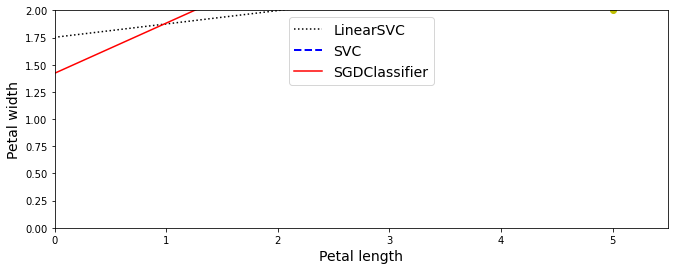

In [53]:
# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "bs") # label="Iris versicolor"
plt.plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])



Solution for exO8

LinearSVC:                    [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


(0.0, 5.5, 0.0, 2.0)

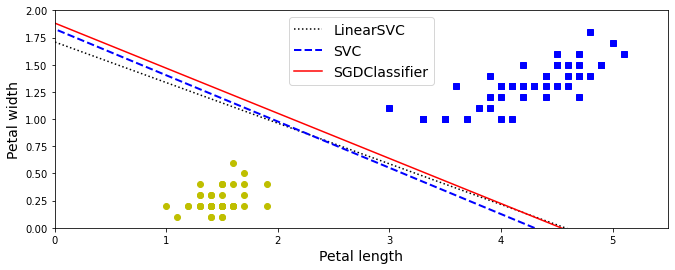

In [54]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])



Ex09

In [55]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [56]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [57]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [58]:
mnist["target"].shape

(70000,)

In [59]:
mnist["frame"].shape


(70000, 785)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(mnist["data"],mnist["target"],
                              test_size=0.2, random_state=42)

In [61]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
47339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
y_train_tmp = (y_train == 5).astype(np.float64)

In [69]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [64]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_scaled, y_train)

/usr/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [66]:
from sklearn.metrics import accuracy_score
y_pred = lin_clf.predict(X_scaled)
accuracy_score(y_pred, y_train)

0.9224285714285714

In [67]:
svm_clf=SVC(gamma="scale")
svm_clf.fit(X_scaled, y_train)

SVC()

In [68]:
y_pred = svm_clf.predict(X_scaled)
accuracy_score(y_pred, y_train)

0.9864821428571429

In [71]:
y_pred = svm_clf.predict(X_test_scaled)
accuracy_score(y_pred, y_test)

0.9625

EXO10

In [73]:
from sklearn.datasets import fetch_california_housing

In [74]:
housing = fetch_california_housing()

In [87]:
X = housing["data"]
y = housing["target"]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import reciprocal, uniform
param_distribution = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1,10)}


In [93]:
rand_search = RandomizedSearchCV(SVR(), param_distribution, n_iter=10, cv=3, random_state=42)


In [94]:
rand_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe590086410>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe590086c80>},
                   random_state=42)

In [96]:
rand_search.best_estimator_

SVR(C=4.745401188473625, gamma=0.07969454818643928)

In [97]:
y_pred = rand_search.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_pred, y_train)
rmse = np.sqrt(mse)

In [99]:
rmse

0.5727524770785356

In [100]:
y_pred = rand_search.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.592916838552874

In [106]:
np.abs(y_pred - y_test)

array([0.06391485, 1.10127437, 1.22939724, ..., 0.20182798, 0.00221477,
       0.19572472])

chapter5.ipynb  datasets/  my_env/
